In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/Gabo0/Desktop/Jupyter Python/Ejercicios Linkedin/base_datos_2008.csv")
df.dropna(inplace=True,subset=["ArrDelay","DepDelay","Distance","AirTime"])

sns.set(rc={'figure.figsize':(15,10)})

D:\Programas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


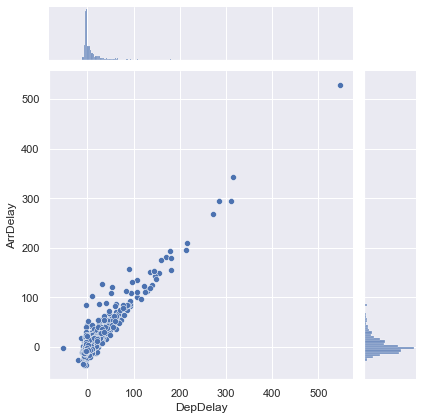

In [3]:
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)

sns.jointplot(df2["DepDelay"],df2["ArrDelay"])

Se crea un nuevo subset para visualizar mejor los datos

In [6]:
df3 = df2[np.abs(df2["DepDelay"])<40]
df3 = df3[np.abs(df3["ArrDelay"])<40]

D:\Programas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


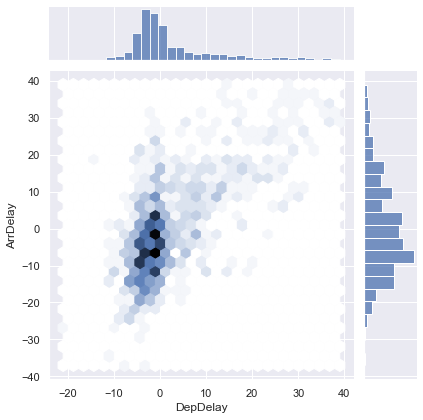

In [7]:
sns.jointplot(df3["DepDelay"],df3["ArrDelay"],kind="hex")

D:\Programas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


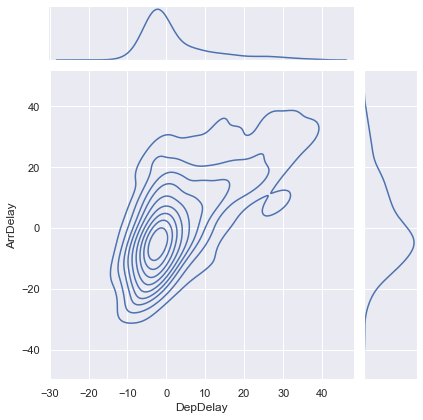

In [9]:
sns.jointplot(df3["DepDelay"],df3["ArrDelay"],kind="kde")

In [10]:
gb_df = pd.DataFrame(df2.groupby(["Origin","Month"],as_index=False)["DepDelay"].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,5.854839
1,ATL,2,7.523810
2,ATL,3,17.820000
3,ATL,4,6.470588
4,ATL,5,9.439394


In [11]:
data = gb_df.pivot("Month","Origin","DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,5.854839,9.428571,16.375000
2,7.523810,28.909091,12.300000
3,17.820000,3.857143,54.200000
4,6.470588,5.000000,3.750000
5,9.439394,7.250000,-1.571429
6,8.529412,5.615385,1.500000
7,28.950820,3.666667,4.166667
8,8.190476,23.800000,1.600000
9,6.656250,18.000000,0.400000


<AxesSubplot:xlabel='Origin', ylabel='Month'>

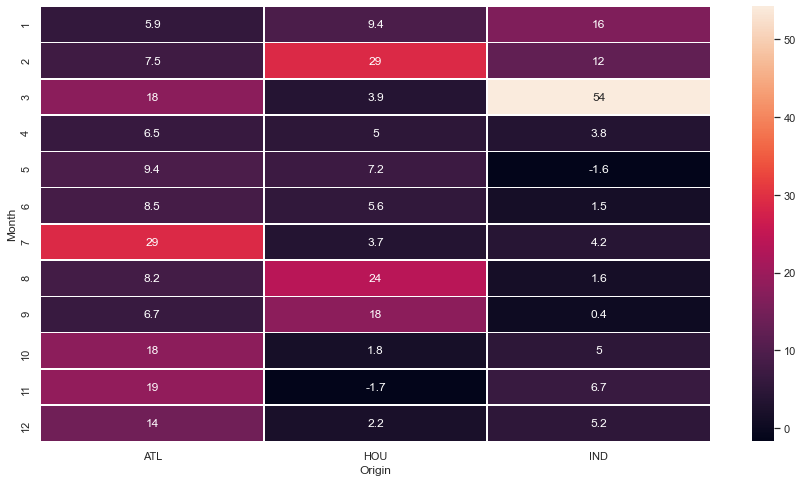

In [12]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data=data,annot=True,linewidths=.5)